<a href="https://colab.research.google.com/github/Datbwoyyy/Egbo-Victor/blob/main/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING OF THE IMAGES

In [ ]:
import os
image_folder = '/content/drive/MyDrive/images'
images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith('.jpg') or img.endswith('.png')]


### LISTING OF THE IMAGES

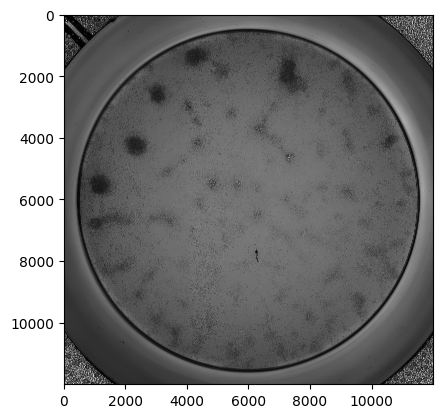

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an example image
img_path = images[0]
img = cv2.imread(img_path)

# Convert the image to RGB (from BGR, which OpenCV uses)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.show()


#### PREPROCESSING OF THE IMAGES

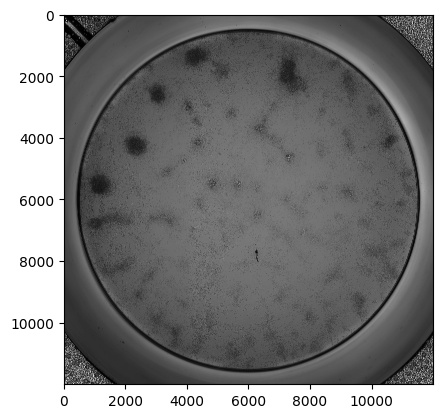

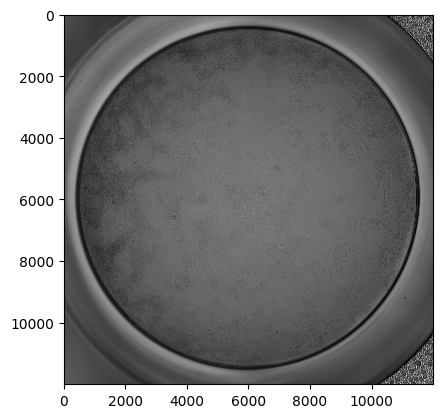

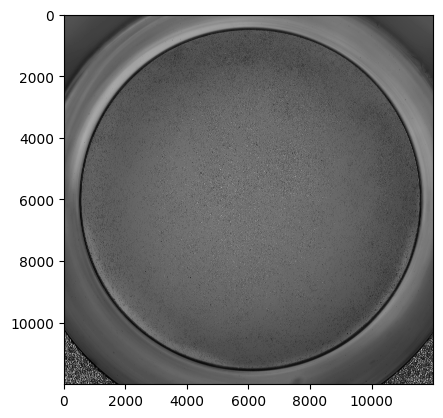

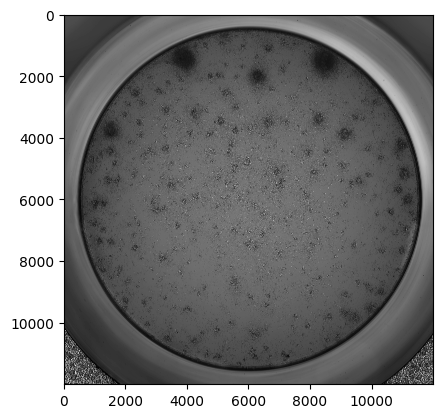

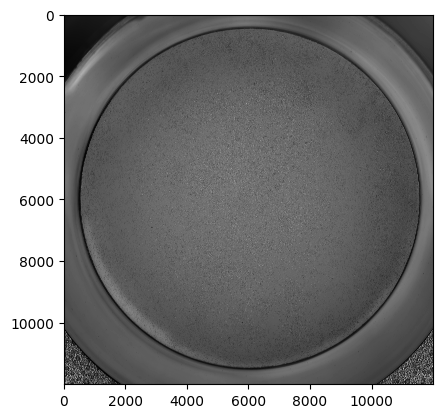

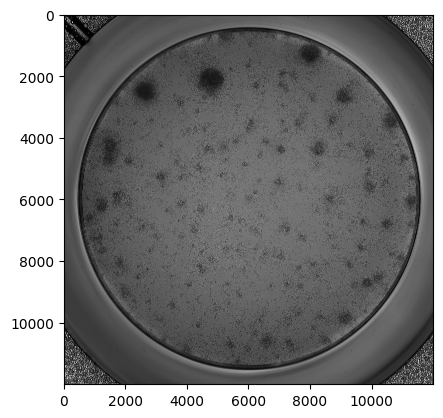

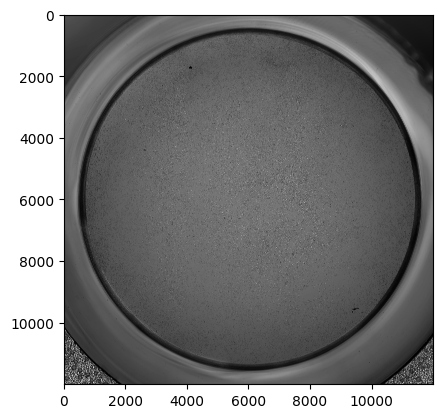

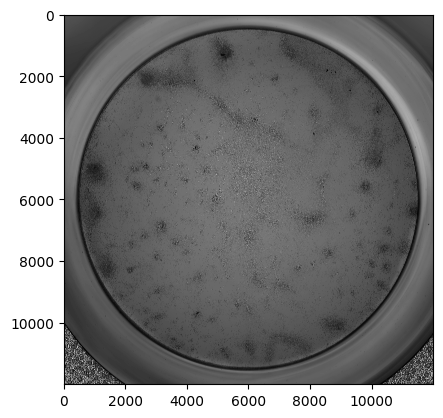

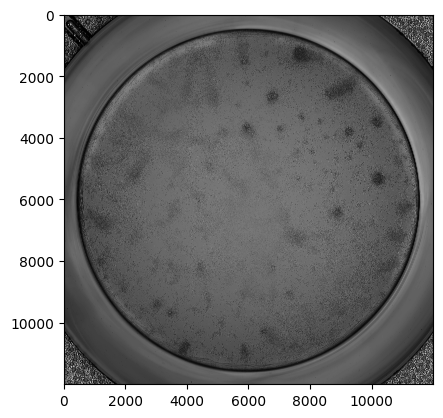

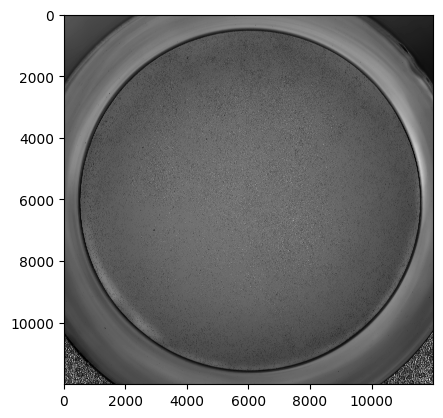

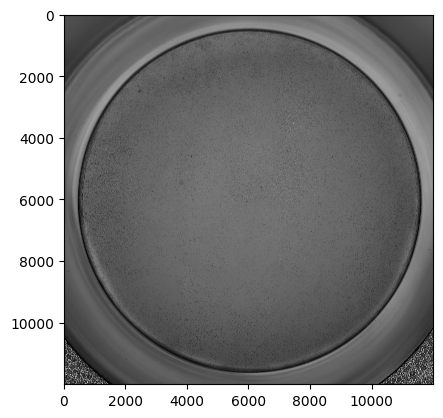

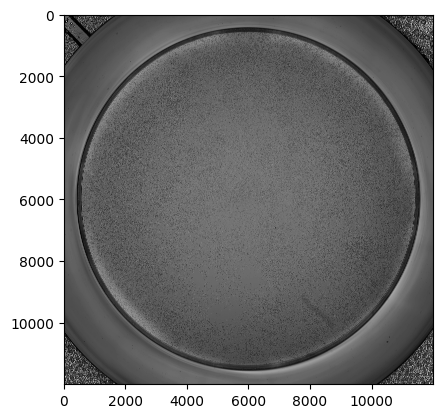

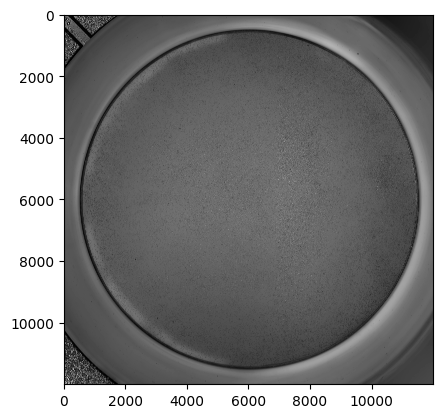

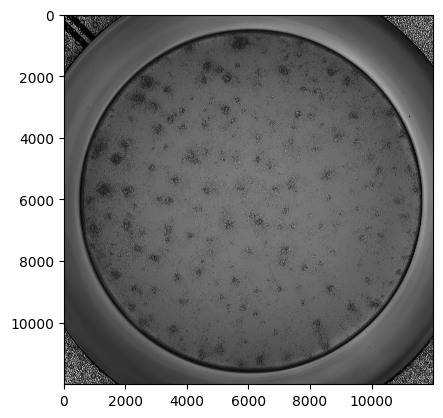

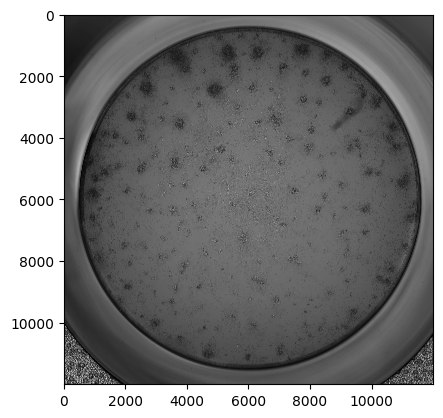

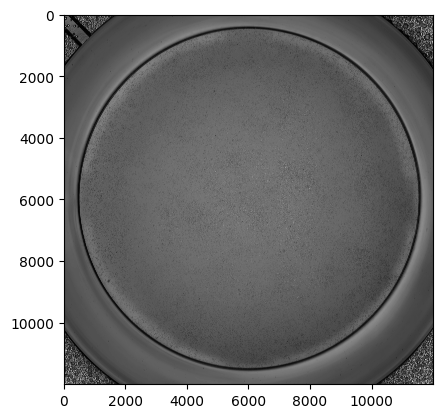

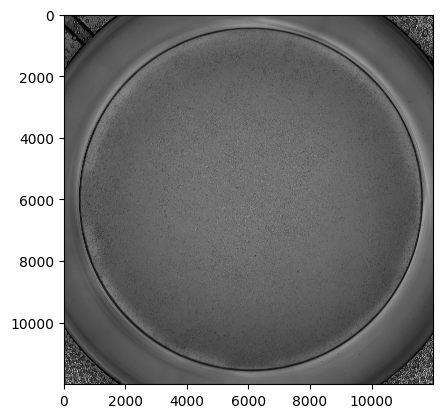

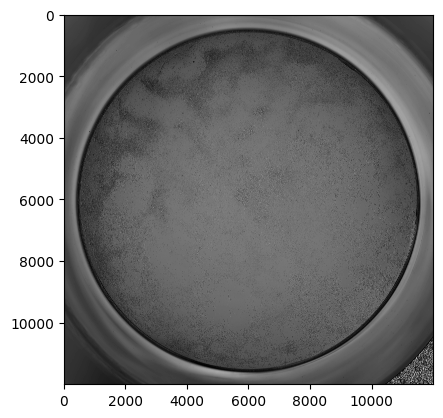

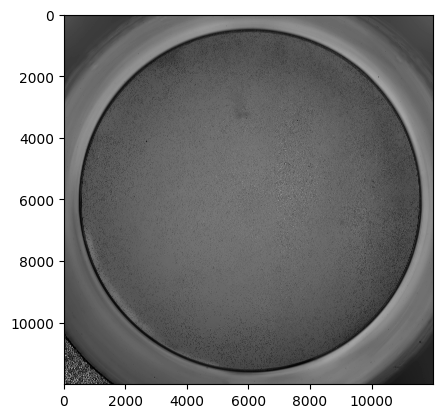

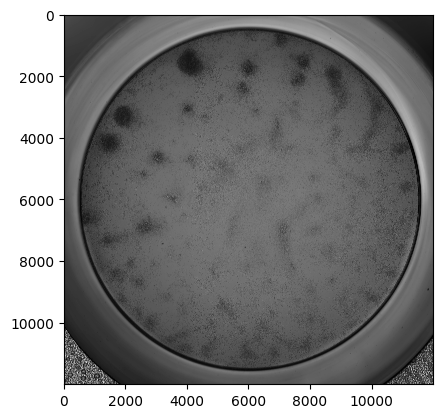

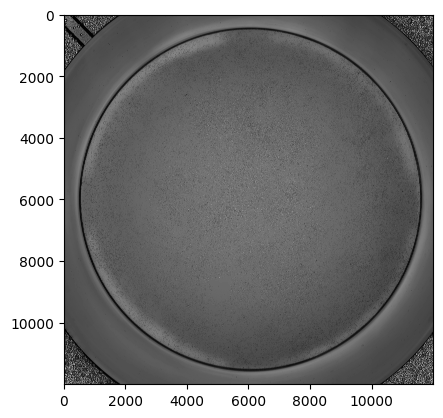

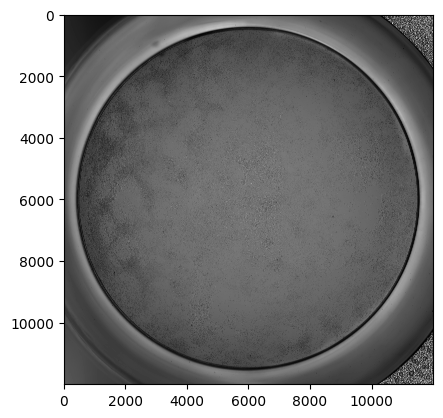

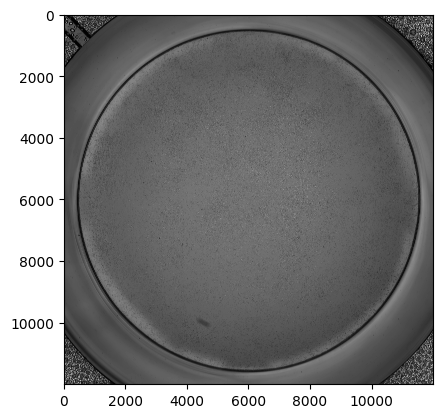

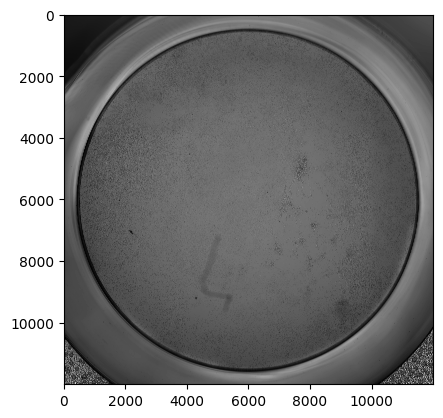

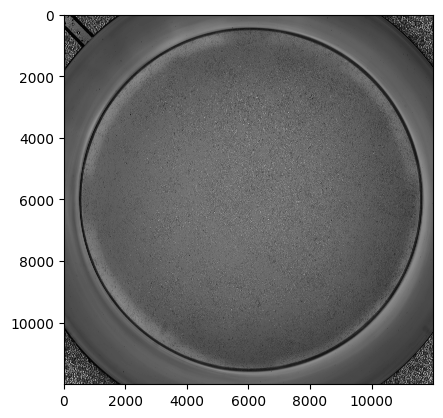

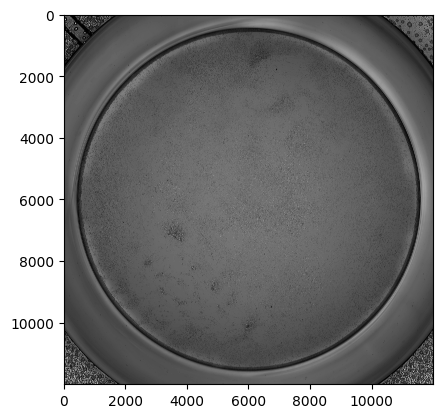

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming images is a list of image file paths or loaded images
for img_path in images:
    # Read the image
    image = cv2.imread(img_path)

    # Check if the image is loaded properly
    if image is None:
        print(f"Failed to load image {img_path}")
        continue

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Display the grayscale image
    plt.imshow(blurred_image, cmap='gray')
    plt.show()


#### IMAGE SEGMENTATION USING UNET

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define U-Net architecture
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    up8 = layers.UpSampling2D(size=(2, 2))(pool1)
    conv8 = layers.Conv2D(64, (2, 2), activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv8)

    model = models.Model(inputs, conv8)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the U-Net model
model = unet_model()
model.summary()

# Assume `train_images` and `train_masks` contain the training data and masks
# You can split your dataset and train the U-Net model
# model.fit(train_images, train_masks, epochs=10, batch_size=8)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 64)        │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,081 (211.25 KB)

 Trainable params: 54,081 (211.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

# Path to your image and mask directories
image_folder = '/content/drive/MyDrive/images'
mask_folder = '/content/drive/MyDrive/Mask'

# List the files in each folder
image_files = sorted(os.listdir(image_folder))
mask_files = sorted(os.listdir(mask_folder))

# Check if the number of files match
if len(image_files) != len(mask_files):
    print(f"Error: Number of images ({len(image_files)}) and masks ({len(mask_files)}) do not match!")
else:
    print(f"Number of images and masks are equal: {len(image_files)}")


Error: Number of images (27) and masks (26) do not match!


In [ ]:
# Ensure that the file names match between images and masks (ignoring extensions)
for img_file, mask_file in zip(image_files, mask_files):
    img_name = os.path.splitext(img_file)[0]  # Remove the extension
    mask_name = os.path.splitext(mask_file)[0]  # Remove the extension

    if img_name != mask_name:
        print(f"Mismatch: {img_file} and {mask_file}")
    else:
        print(f"Matched: {img_file} and {mask_file}")


Mismatch: .ipynb_checkpoints and A-1.jpg
Mismatch: A-1.jpg and A-10.jpg
Mismatch: A-10.jpg and A-11.jpg
Mismatch: A-11.jpg and A-12.jpg
Mismatch: A-12.jpg and A-2.jpg
Mismatch: A-2.jpg and A-3.jpg
Mismatch: A-3.jpg and A-4.jpg
Mismatch: A-4.jpg and A-5.jpg
Mismatch: A-5.jpg and A-6.jpg
Mismatch: A-6.jpg and A-7.jpg
Mismatch: A-7.jpg and A-8.jpg
Mismatch: A-8.jpg and A-9.jpg
Mismatch: A-9.jpg and B-1.jpg
Mismatch: B-1.jpg and B-10.jpg
Mismatch: B-10.jpg and B-11.jpg
Mismatch: B-11.jpg and B-12.jpg
Mismatch: B-12.jpg and B-2.jpg
Mismatch: B-2.jpg and B-3.jpg
Mismatch: B-3.jpg and B-4.jpg
Mismatch: B-4.jpg and B-5.jpg
Mismatch: B-5.jpg and B-6.jpg
Mismatch: B-6.jpg and B-7.jpg
Mismatch: B-7.jpg and B-8.jpg
Mismatch: B-8.jpg and B-9.jpg
Mismatch: B-9.jpg and C-1.jpg
Mismatch: C-1.jpg and C-10 (3).jpg


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to your image and mask directories
image_folder = '/content/drive/MyDrive/images'
mask_folder = '/content/drive/MyDrive/Mask'

# List the files in each folder
image_files = sorted(os.listdir(image_folder))
mask_files = sorted(os.listdir(mask_folder))


# Ensure that you are reading corresponding mask data to your images.
# We will use only the mask file names that exist in image_files.
mask_files = [mask_file for mask_file in mask_files if os.path.splitext(mask_file)[0] in [os.path.splitext(image_file)[0] for image_file in image_files]]

# Check if the number of files match
if len(image_files) != len(mask_files):
    print(f"Error: Number of images ({len(image_files)}) and masks ({len(mask_files)}) do not match!")
else:
    print(f"Number of images and masks are equal: {len(image_files)}")

    # Assuming you have two lists or arrays: images and masks
    # Both lists should correspond, i.e., images[i] should correspond to masks[i]

    # Convert lists to numpy arrays if they aren't already
    images = np.array(images)

    # Ensure your masks DataFrame contains only data for the selected mask files
    mask_data = pd.read_csv('/content/mask_csv.csv')
    mask_data = mask_data[mask_data['filename'].isin(mask_files)] # Filter mask data to match existing mask file names
    masks = mask_data  # or you might select specific column, for example mask_data['mask_column']

    # Split the data into training and validation sets (80% training, 20% validation)
    train_images, val_images, train_masks, val_masks = train_test_split(
        images, masks, test_size=0.2, random_state=42)

    print(f"Training set size: {len(train_images)}")
    print(f"Validation set size: {len(val_images)}")

In [ ]:
# Assuming segmented_image is your mask (binary output from the segmentation model)
# Convert the mask to 3 channels to match the original image
segmented_image_colored = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)

# Combine the original image and the segmented image
combined_image = cv2.addWeighted(image, 0.7, segmented_image_colored, 0.3, 0)

# Display the combined image
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
# Save the images
cv2.imwrite('/path_to_save/original_image.jpg', image)
cv2.imwrite('/path_to_save/segmented_image.jpg', segmented_image)
cv2.imwrite('/path_to_save/combined_image.jpg', combined_image)
